In [103]:
import sys 
# sys.path.append("/Users/Kamil/Documents/PAI/openface")
import openface
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt

In [104]:
modelDir = os.path.join('openface/models')
dlibModelDir = os.path.join(modelDir, 'dlib')
openfaceModelDir = os.path.join(modelDir, 'openface')
modelDir

'openface/models'

In [105]:
imgDim = 96

In [106]:
dlibFacePredictor = os.path.join(dlibModelDir,     "shape_predictor_68_face_landmarks.dat")
networkModel      = os.path.join(openfaceModelDir, 'nn4.small2.v1.t7')

In [107]:
align = openface.AlignDlib(dlibFacePredictor)
net   = openface.TorchNeuralNet(networkModel, imgDim)

In [108]:
imgPath = "practical-ai/3/ml/faces/blair_1.jpg"

In [109]:
def face_rep(imgPath, silent=False):
    print(imgPath)
    bgrImg = cv2.imread(imgPath)
    rgbImg = cv2.cvtColor(bgrImg, cv2.COLOR_BGR2RGB)
    
    if not silent:
        plt.imshow(rgbImg)
        plt.show()
    
    bb = align.getLargestFaceBoundingBox(rgbImg)
    alignedFace = align.align(imgDim, rgbImg, bb, landmarkIndices=openface.AlignDlib.OUTER_EYES_AND_NOSE)
    
    if not silent:
        plt.imshow(alignedFace)
        plt.show()
    
    return net.forward(alignedFace)

practical-ai/3/ml/faces/blair_1.jpg


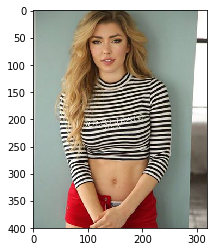

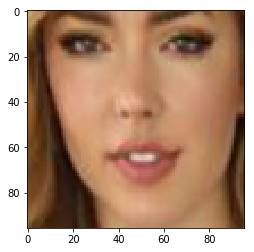

array([ 0.05663029, -0.02252008,  0.10530224,  0.02951483,  0.02556959,
       -0.03182178,  0.12878752,  0.05024978,  0.0788759 , -0.19337271,
        0.11717011,  0.04795808,  0.0126186 , -0.1209661 , -0.16153525,
       -0.01283581, -0.17142713,  0.08214067, -0.3313359 ,  0.09025022,
        0.16270633, -0.02763173, -0.03255052,  0.03526821, -0.11271149,
       -0.08921026, -0.12441924, -0.0357586 ,  0.0187487 , -0.03729358,
       -0.10162488,  0.02563453, -0.06876879,  0.11010382, -0.06104515,
       -0.070944  , -0.09012628,  0.07708357, -0.09949414,  0.0552318 ,
        0.1137653 ,  0.01646934, -0.06756154,  0.04405649, -0.03056036,
       -0.06881496, -0.02239106, -0.06475778, -0.0980291 ,  0.06658182,
       -0.13665573, -0.04885003, -0.16945559,  0.08956667, -0.02207537,
       -0.03583249, -0.03944192,  0.02111595, -0.10068401,  0.06108275,
        0.02595697,  0.03347753,  0.07085235,  0.12335763, -0.0613507 ,
       -0.05255275,  0.00823185, -0.05926879,  0.01928553,  0.03

In [89]:
face_rep(imgPath)

In [110]:
from pathlib import Path

images = []
labels = []

for path in Path('/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces').glob("*.jpg"):
    label = path.name.lower().split('_')[0]
    images.append(path)
    labels.append(label)

X = [face_rep(str(img), silent=True) for img in images]

/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/aydar_84.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/aydar_1.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/leisan_1.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/kamil_1.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/semyon_1.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/kamil_13.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/kamil_2.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/kamil_3.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/roman_40.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/roman_27.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/kamil_62.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/kamil_67.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/blair_1.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/blair_2.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/ilnar_1.jpg
/Users/Kamil/Documents/PAI/practical-ai/3/ml/fa

In [111]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X, labels) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/sylvester_2.jpg


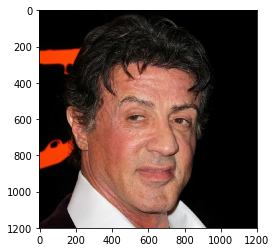

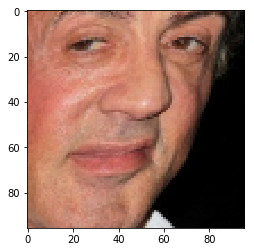

'sylvester'

In [99]:
clf.predict([face_rep('/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/sylvester_2.jpg')])[0]

In [112]:
from time import sleep
from cv2 import VideoCapture

import random 

def capture(label):
    cam = VideoCapture(0) 
    sleep(1)  
    s, img = cam.read()
    cam.release()
    if s:
        i = random.randint(1, 99)
        name  = '/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/' + label + '_' + str(i) + '.jpg'
        print(name)
        cv2.imwrite(name, img) 
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   
        plt.imshow(img)
        plt.show()
   
    return name

/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/roman_90.jpg


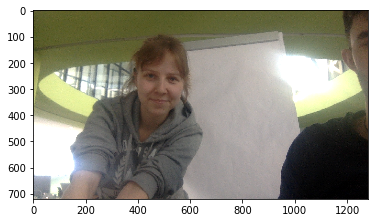

/Users/Kamil/Documents/PAI/practical-ai/3/ml/faces/roman_90.jpg


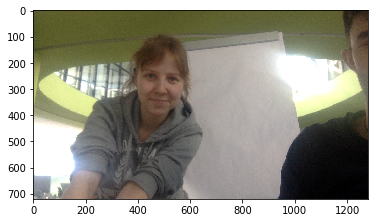

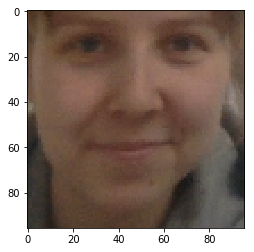

'leisan'

In [113]:
name = capture('roman')
clf.predict([face_rep(name)])[0]